In [8]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.33.1
    Uninstalling pydantic_core-2.33.1:
      Successfully uninstalled pydantic_core-2.33.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.11.2
    Uninstalling pydantic-2.11.2:
      Successfully uninstalled pydantic-2.11.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.8 MB/s eta 0:00:00
  Preparing met

In [50]:
import warnings
import math

# Ignorowanie ostrzeżeń
warnings.filterwarnings("ignore")

# Importy Qiskit
import qiskit as qs
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, array_to_latex

# Importy Qiskit IBM Runtime
from qiskit_ibm_runtime import QiskitRuntimeService, Batch, Sampler

**ZADANIE 1**

Zaimplementować obwody z zadań obliczeniowych używając biblioteki qiskit. Przetestować (można używając narzędzi lokalnych).

In [51]:
# liczba kubitów w obwodzie
qnumber=2

Zad.1.1

In [11]:
# Tworzymy obwód kwantowy z dwoma kubitami
qc11 = QuantumCircuit(qnumber)

# Inicjalizacja kubitów w stanie |x1x0> (stan |0⟩ na obu kubitach)
# Kubit 0 jest w stanie |0⟩
# Kubit 1 jest w stanie |0⟩

# Zastosowanie bramki obrotu wokół osi X na kubicie 0 o kąt 2π/3
phi = 2 * math.pi / 3

# Zastosowanie bramki Rx na kubicie 0
qc11.rx(phi, 0)

# Zastosowanie bramki Hadamarda na kubicie 1
qc11.h(1)

# Wyświetlenie obwodu
qc11.draw()

┌──────────┐
q_0: ┤ Rx(2π/3) ├
     └──┬───┬───┘
q_1: ───┤ H ├────
        └───┘

In [12]:
# tworzy wektor stanu układu kwantowego na podstawie obwodu qc11
state11 = Statevector.from_instruction(qc11)

In [13]:
# iteracja po wszystkich możliwych stanach układu kwantowego i wypisywanie ich amplitudy
# amplitudy - liczby zespolone związane z prawdopodobieństwem pomiaru danego stanu
for x in range(pow(2,qnumber)):
    print(x, state11[x])

0 (0.3535533905932738+0j)
1 -0.6123724356957945j
2 (0.3535533905932738+0j)
3 -0.6123724356957945j


In [14]:
state11.draw('latex')

<IPython.core.display.Latex object>

In [15]:
array_to_latex(state11)

<IPython.core.display.Latex object>

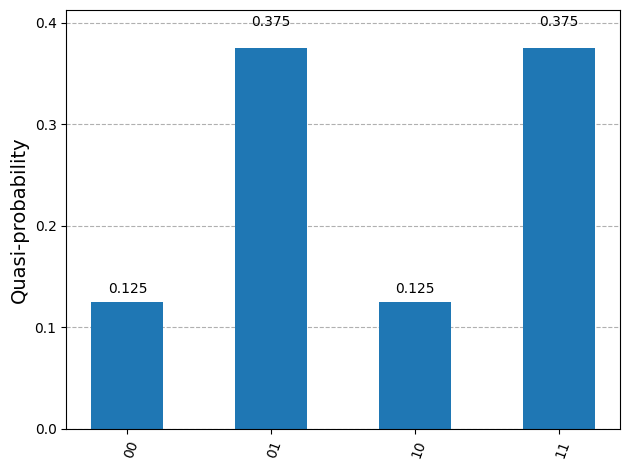

In [16]:
# pobranie danych do słownika - moduł amplitudy do kwadratu to prawdopodobieństwo pomiaru
ideal_distribution = state11.probabilities_dict()
plot_histogram(ideal_distribution)

Zad1.2

In [17]:
# Tworzymy obwód kwantowy z określoną liczbą kubitów
qc12 = QuantumCircuit(qnumber)

# Dodanie bramki Hadamarda na kubicie 0, co wprowadza kubit 0 w superpozycję
qc12.h(0)

# Dodanie bramki obrotu wokół osi Y (Ry) na kubicie 1, gdzie kąt obrotu wynosi
# 2 * arctan(1/sqrt(2)), który został wcześniej obliczony
qc12.ry(2*math.atan(1/math.sqrt(2)), 1)

# Dodanie bramki kontrolowanej Hadamarda (CH) na kubicie 1 (jako kontrola)
# i kubicie 0 (jako cel). Bramkę Hadamarda na kubicie 0 zastosujemy,
# tylko jeśli kubit 1 będzie w stanie |1⟩
qc12.ch(1,0)

# Wyświetlamy schemat obwodu kwantowego
display(qc12.draw())

┌───┐    ┌───┐
q_0: ────┤ H ├────┤ H ├
     ┌───┴───┴───┐└─┬─┘
q_1: ┤ Ry(1.231) ├──■──
     └───────────┘

In [18]:
state12 = Statevector.from_instruction(qc12)

In [19]:
for x in range(pow(2,qnumber)):
    print(x,state12[x])

0 (0.5773502691896257+0j)
1 (0.5773502691896257+0j)
2 (0.5773502691896256+0j)
3 (-8.003411675637281e-18+0j)


In [20]:
state12.draw('latex')

<IPython.core.display.Latex object>

In [21]:
array_to_latex(state12)

<IPython.core.display.Latex object>

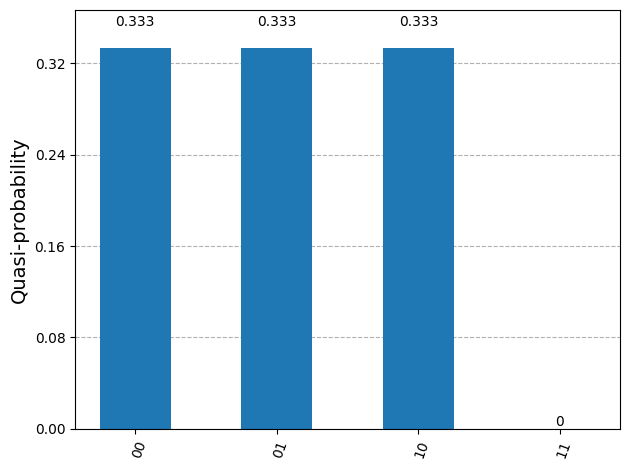

In [22]:
ideal_distribution = state12.probabilities_dict()
plot_histogram(ideal_distribution)

**ZADANIE 2**

Za pomocą wybranego  przez siebie przykładowego  minimum 3-qbitowego obwodu kwantowego należy zademonstrować różnice pomiędzy:
1. dokładnymi, wyliczonymi prawdopodobieństwami
2. histogramem  otrzymanym przez próbkowanie zgodnie z prawdopodobieństwami otrzymanymi z wybranego symulatora
3. histogramem z prawdziwego urządzenia kwantowego

In [64]:
qnumber=3
qc2= QuantumCircuit(qnumber)
# Add a H gate on qubit 0, putting this qubit in superposition.
qc2.h(0)

qc2.cx(1,2)
qc2.x(2)

qc2.rx(phi, 2)

qc2.cx(0,1)

phi = 2 * math.pi / 3

# Zastosowanie bramki Rx na kubicie 0


display(qc2.draw())

┌───┐                 
q_0: ┤ H ├──■──────────────
     └───┘┌─┴─┐            
q_1: ──■──┤ X ├────────────
     ┌─┴─┐├───┤┌──────────┐
q_2: ┤ X ├┤ X ├┤ Rx(2π/3) ├
     └───┘└───┘└──────────┘

In [65]:
#używamy dokładnego symulatora statevector lokalnie
state2 = Statevector.from_instruction(qc2)
state2.draw('latex')

<IPython.core.display.Latex object>

In [66]:
from qiskit.visualization import array_to_latex

#alternatywny sposób
array_to_latex(state2)

<IPython.core.display.Latex object>

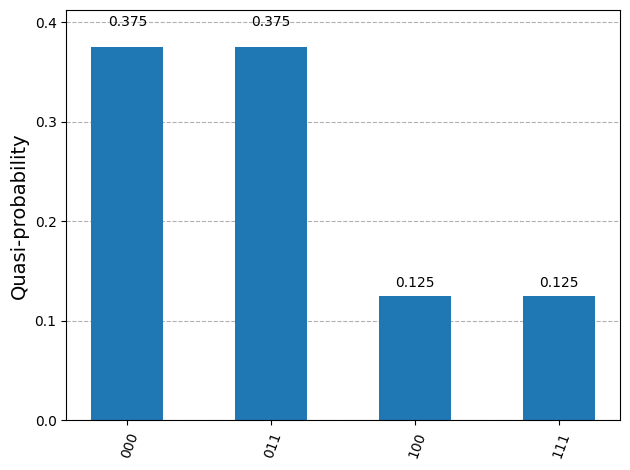

In [67]:
ideal_distribution2 = state2.probabilities_dict()
plot_histogram(ideal_distribution2)

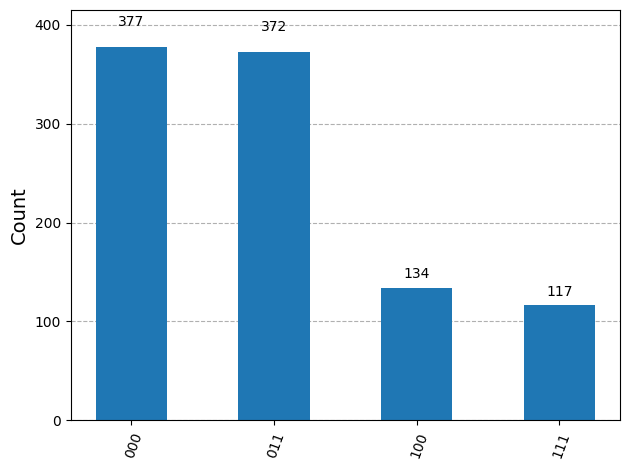

In [71]:
statistics2 = state2.sample_counts(1000)
plot_histogram(statistics2)

In [73]:
qc2.measure_all()
display(qc2.draw())

┌───┐                  ░ ┌─┐       ░ ┌─┐      
    q_0: ┤ H ├──■───────────────░─┤M├───────░─┤M├──────
         └───┘┌─┴─┐             ░ └╥┘┌─┐    ░ └╥┘┌─┐   
    q_1: ──■──┤ X ├─────────────░──╫─┤M├────░──╫─┤M├───
         ┌─┴─┐├───┤┌──────────┐ ░  ║ └╥┘┌─┐ ░  ║ └╥┘┌─┐
    q_2: ┤ X ├┤ X ├┤ Rx(2π/3) ├─░──╫──╫─┤M├─░──╫──╫─┤M├
         └───┘└───┘└──────────┘ ░  ║  ║ └╥┘ ░  ║  ║ └╥┘
 meas: 3/══════════════════════════╩══╩══╩═════╬══╬══╬═
                                   0  1  2     ║  ║  ║ 
meas0: 3/══════════════════════════════════════╩══╩══╩═
                                               0  1  2

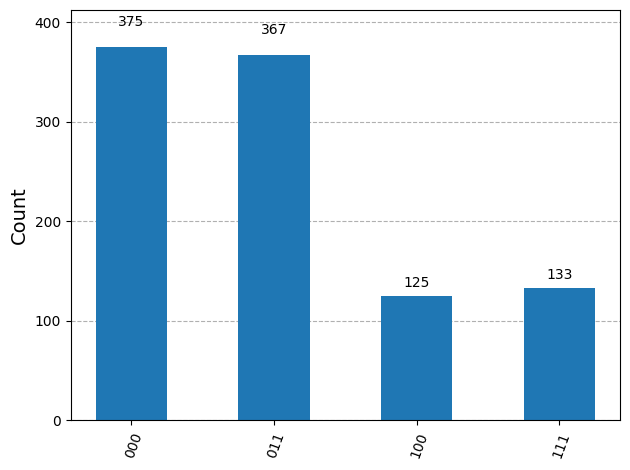

In [79]:
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
# inicjalizujemy Sampler
sampler2 = Sampler()

job2 = sampler2.run([qc2], shots=1000)
job_result2 = job2.result()

pub_result2 = job2.result()[0]
# print(pub_result2.data)
counts2 = pub_result2.data.meas.get_counts()
#wyniki na histogramie
plot_histogram(counts2)

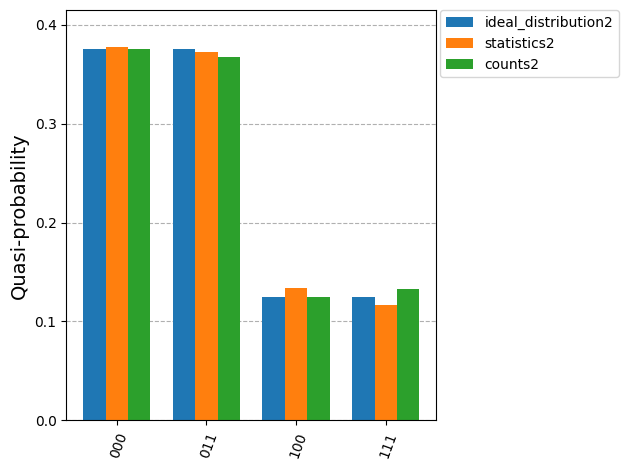

In [82]:
from qiskit.visualization import plot_histogram

binary_prob = [ideal_distribution2, statistics2, counts2]
plot_histogram(
    binary_prob,
    bar_labels=False,
    legend=[
        "ideal_distribution2",
        "statistics2",
        "counts2"
    ],
)


**ZADANIE 3**

Używając  minimum 3-qbitowego obwodu należy zademonstrować różnice  pomiędzy:
1. obwodem użytkownika
2. obwodem otrzymanym z transpilera dla wybranego urządzenia kwantowego

Wybrany obwód użytkownika -> obwód 2 z zadania pierwszego - ***qc12***

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
     ┌───┐└┬─┬┘ ║ └╥┘
q_2: ┤ X ├─┤M├──╫──╫─
     └───┘ └╥┘  ║  ║ 
c: 3/═══════╩═══╩══╩═
            2   0  1 


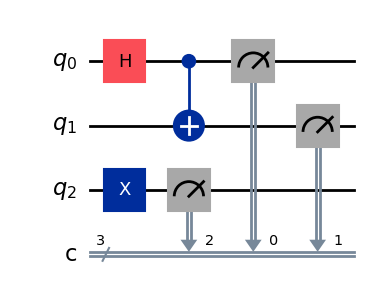

In [83]:
# Tworzymy obwód kwantowy z 3 kubitami i 3 bitami klasycznymi
qc3 = QuantumCircuit(3, 3)

# 1. Bramki kwantowe
qc3.h(0)        # Hadamard na kubicie 0 (superpozycja)
qc3.cx(0, 1)    # CNOT (splątanie q0 i q1)
qc3.x(2)        # Bramkę X na kubicie 2

# 2. Pomiar kubitów
qc3.measure([0, 1, 2], [0, 1, 2])

# 3. Wyświetlenie obwodu
print(qc3)
qc3.draw('mpl')

Teraz ten obwód ztranspilujemy do formy adekwatnej do architektury ibm brisbane

In [84]:
service = QiskitRuntimeService(
   channel='ibm_quantum',
   instance='ibm-q/open/main',
   token=read_token('ibm_token.txt')
)

In [85]:
backend=service.backend('ibm_brisbane')

In [86]:
# najwyższy poziom optymalizacji – intensywne przekształcenia, minimalizuje liczbę operacji i dostosowuje obwód do fizycznych ograniczeń sprzętu
optimization_level=3
t_qc = transpile(qc3, backend, optimization_level=optimization_level, seed_transpiler=0)
print(f"optimization_level={optimization_level}: ", t_qc.count_ops())

optimization_level=3:  OrderedDict([('rz', 3), ('measure', 3), ('sx', 2), ('x', 2), ('ecr', 1)])


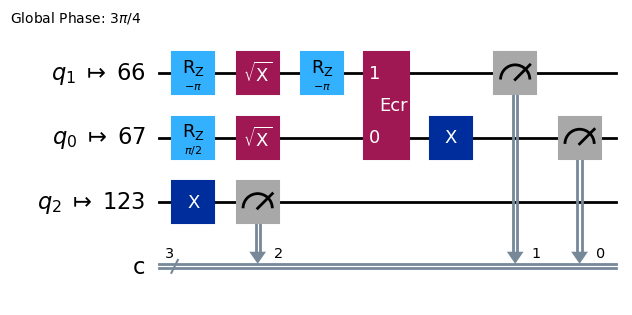

In [87]:
t_qc.draw(output="mpl", style="iqp", idle_wires=False)

sx - pierwiastek z bramki X  
rz - rotacja wokół osi Z  
ecr - dwukubitowa bramka  
x - bramka Pauliego